In [1]:
from PIL import Image
from transformers import AutoProcessor, AutoModel
import torch

In [8]:
import deeplake

In [9]:
ds = deeplake.load("hub://activeloop/tiny-imagenet-train")

-

Opening dataset in read-only mode as you don't have write permissions.


\

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/tiny-imagenet-train


|

hub://activeloop/tiny-imagenet-train loaded successfully.


In [10]:
ds.summary()

Dataset(path='hub://activeloop/tiny-imagenet-train', read_only=True, tensors=['boxes', 'images', 'labels'])

 tensor      htype             shape           dtype  compression
 -------    -------           -------         -------  ------- 
  boxes      bbox         (100000, 1, 4)      float32   None   
 images      image     (100000, 64, 64, 1:3)   uint8    jpeg   
 labels   class_label       (100000, 1)       uint32    None   


In [139]:
ds.labels.shape[0]

100000

In [78]:
image = ds.images[0].numpy()
labels = ds.labels[0].data()

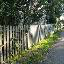

In [80]:
import PIL.Image
import IPython.display
IPython.display.display(PIL.Image.fromarray(image))

In [140]:
all_labels = set([i[0] for i in ds.labels[0:100000].data(aslist=True)['text']])
all_labels = sorted(all_labels)
all_labels

['African elephant',
 'American alligator',
 'American lobster',
 'Arabian camel',
 'CD player',
 'Chihuahua',
 'Christmas stocking',
 'Egyptian cat',
 'European fire salamander',
 'German shepherd',
 'Labrador retriever',
 'Persian cat',
 'Yorkshire terrier',
 'abacus',
 'academic gown',
 'acorn',
 'albatross',
 'alp',
 'altar',
 'apron',
 'baboon',
 'backpack',
 'banana',
 'bannister',
 'barbershop',
 'barn',
 'barrel',
 'basketball',
 'bathtub',
 'beach wagon',
 'beacon',
 'beaker',
 'bee',
 'beer bottle',
 'bell pepper',
 'bighorn',
 'bikini',
 'binoculars',
 'birdhouse',
 'bison',
 'black stork',
 'black widow',
 'boa constrictor',
 'bow tie',
 'brain coral',
 'brass',
 'broom',
 'brown bear',
 'bucket',
 'bullet train',
 'bullfrog',
 'butcher shop',
 'candle',
 'cannon',
 'cardigan',
 'cash machine',
 'cauliflower',
 'centipede',
 'chain',
 'chest',
 'chimpanzee',
 'cliff',
 'cliff dwelling',
 'cockroach',
 'comic book',
 'computer keyboard',
 'confectionery',
 'convertible',
 'c

In [5]:
model = AutoModel.from_pretrained("google/siglip-base-patch16-224")
processor = AutoProcessor.from_pretrained("google/siglip-base-patch16-224")

In [119]:
import random

In [141]:
def image_texts(i):
    if i >= ds.labels.shape[0]:
        return None
    image = ds.images[i].numpy()
    name = ds.labels[0].data()['text'][0]
    i = random.randint(0, len(all_labels) - 1)
    while all_labels[i] == name:
        i = random.randint(0, len(all_labels) - 1)
    texts = [name, all_labels[i]]
    return (image, texts)

In [142]:
for i in range(5):
    image, texts = image_texts(i)
    inputs = processor(text=texts, images=image, padding="max_length", return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image
    probs = torch.sigmoid(logits_per_image)
    print(f"{probs[0][0]:.1%} that image {i} is '{texts[0]}'")

22.4% that image 0 is 'picket fence'
0.0% that image 1 is 'picket fence'
32.0% that image 2 is 'picket fence'
0.1% that image 3 is 'picket fence'
0.1% that image 4 is 'picket fence'
